Le jeu de données des fleurs d'Iris, également appelé ensemble de données Iris de Fisher, est un ensemble de données multivariées introduit par le statisticien britannique, eugéniste et biologiste Ronald Fisher dans son article de 1936 intitulé "L'utilisation de mesures multiples dans les problèmes taxonomiques comme exemple d'analyse discriminante linéaire". Il est parfois appelé ensemble de données Iris d'Anderson car Edgar Anderson a collecté les données pour quantifier la variation morphologique des fleurs d'Iris de trois espèces apparentées. Deux des trois espèces ont été collectées dans la péninsule de Gaspé, "toutes dans le même pâturage, et cueillies le même jour et mesurées en même temps par la même personne avec le même appareil". L'article de Fisher a été publié dans la revue, les Annales d'Eugénique, suscitant la controverse sur l'utilisation continue de l'ensemble de données Iris pour enseigner les techniques statistiques aujourd'hui.

L'ensemble de données se compose de 50 échantillons de chacune des trois espèces d'Iris (Iris setosa, Iris virginica et Iris versicolor). Quatre caractéristiques ont été mesurées pour chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres. En se basant sur la combinaison de ces quatre caractéristiques, Fisher a développé un modèle discriminant linéaire pour distinguer les espèces les unes des autres.

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

Image: https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

Cette étude vise à regrouper l'ensemble de données Iris en utilisant l'algorithme K-means.

[Attribute Information:
](https://archive.ics.uci.edu/ml/datasets/iris)
1. Longueur du sépale en cm
2. Largeur du sépale en cm
3. Longueur du pétale en cm
4. Largeur du pétale en cm
5. Classe :
   - Iris Setosa
   - Iris Versicolore
   - Iris Virginica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = pd.read_csv("IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values


In [3]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_outcome = pd.crosstab(index=iris["species"],
                              columns="count")     

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [5]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

/home/jimmydevia/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/jimmydevia/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/jimm

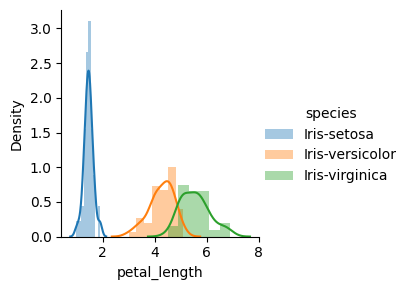

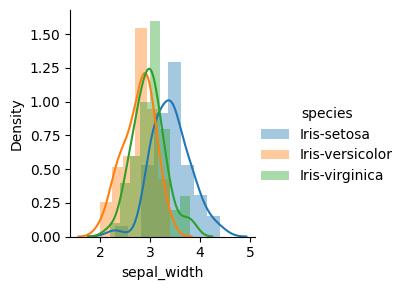

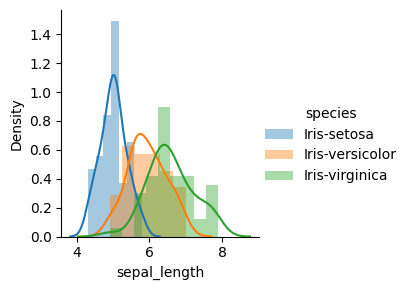

In [6]:
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()


plt.show()

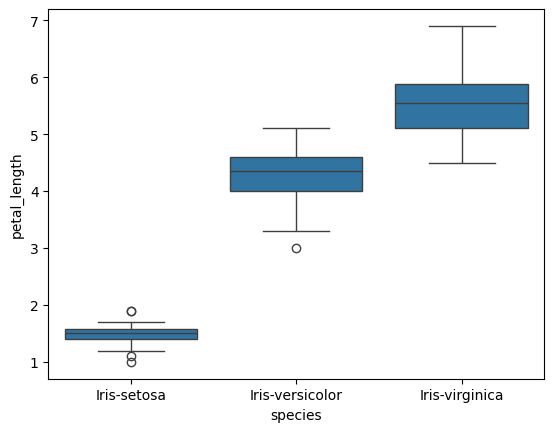

In [7]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

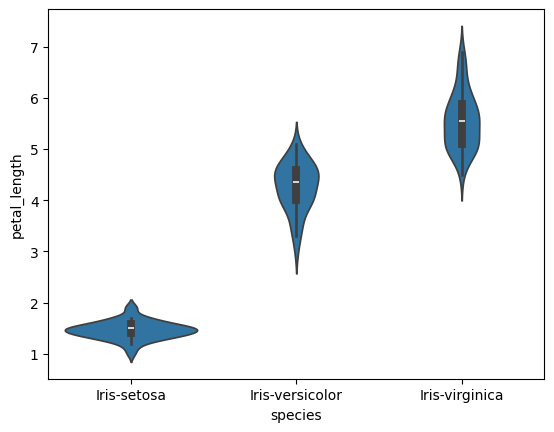

In [8]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

/home/jimmydevia/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


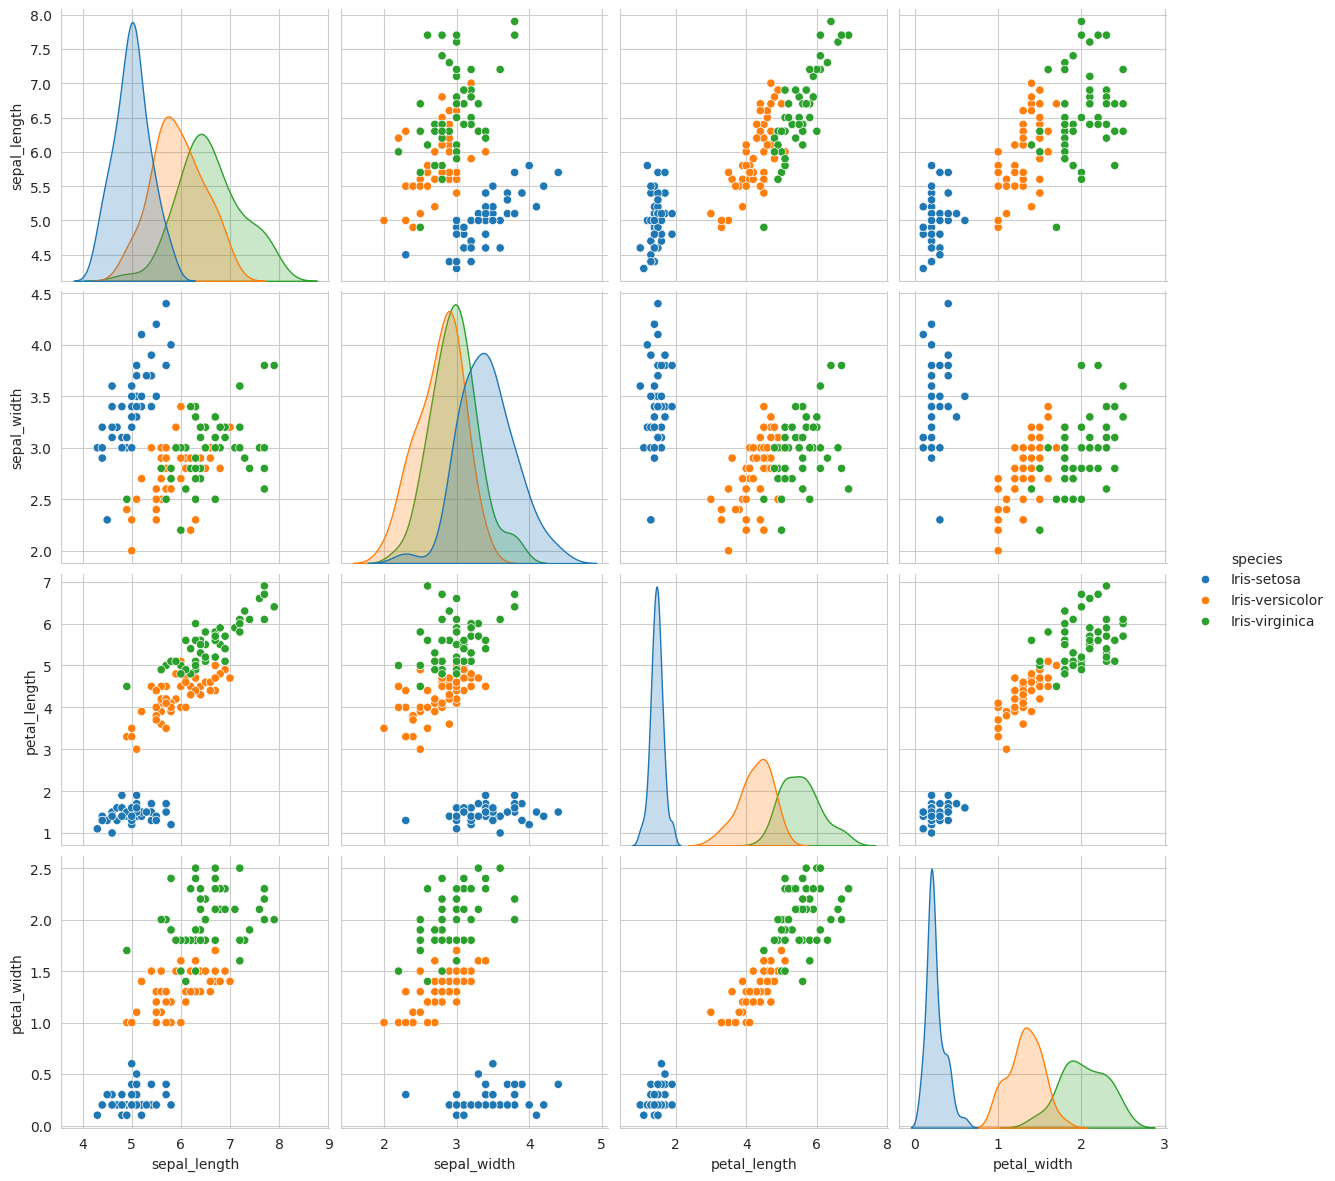

In [9]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

# K-Means

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) est un algorithme basé sur les centroïdes, ou un algorithme basé sur la distance, où nous calculons les distances pour attribuer un point à un cluster. Dans K-Means, chaque cluster est associé à un centroïde.

# Comment implémenter le regroupement K-Means ?

* Choisir le nombre de clusters k.
* Sélectionner k points aléatoires à partir des données comme centroids.
* Assigner tous les points au centroid de cluster le plus proche.
* Recalculer les centroids des clusters nouvellement formés.
* Répéter les étapes 3 et 4.

In [10]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Utilisation de la méthode du coude pour déterminer le nombre optimal de clusters pour le regroupement K-means

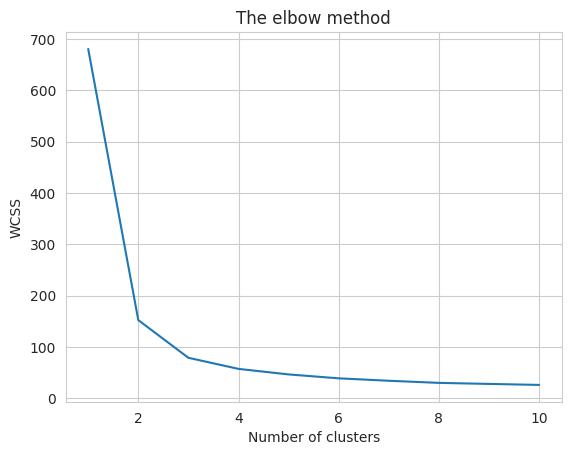

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Implémentation du regroupement K-Means

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

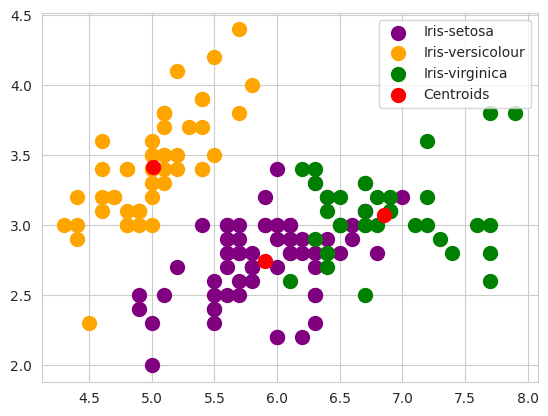

In [13]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

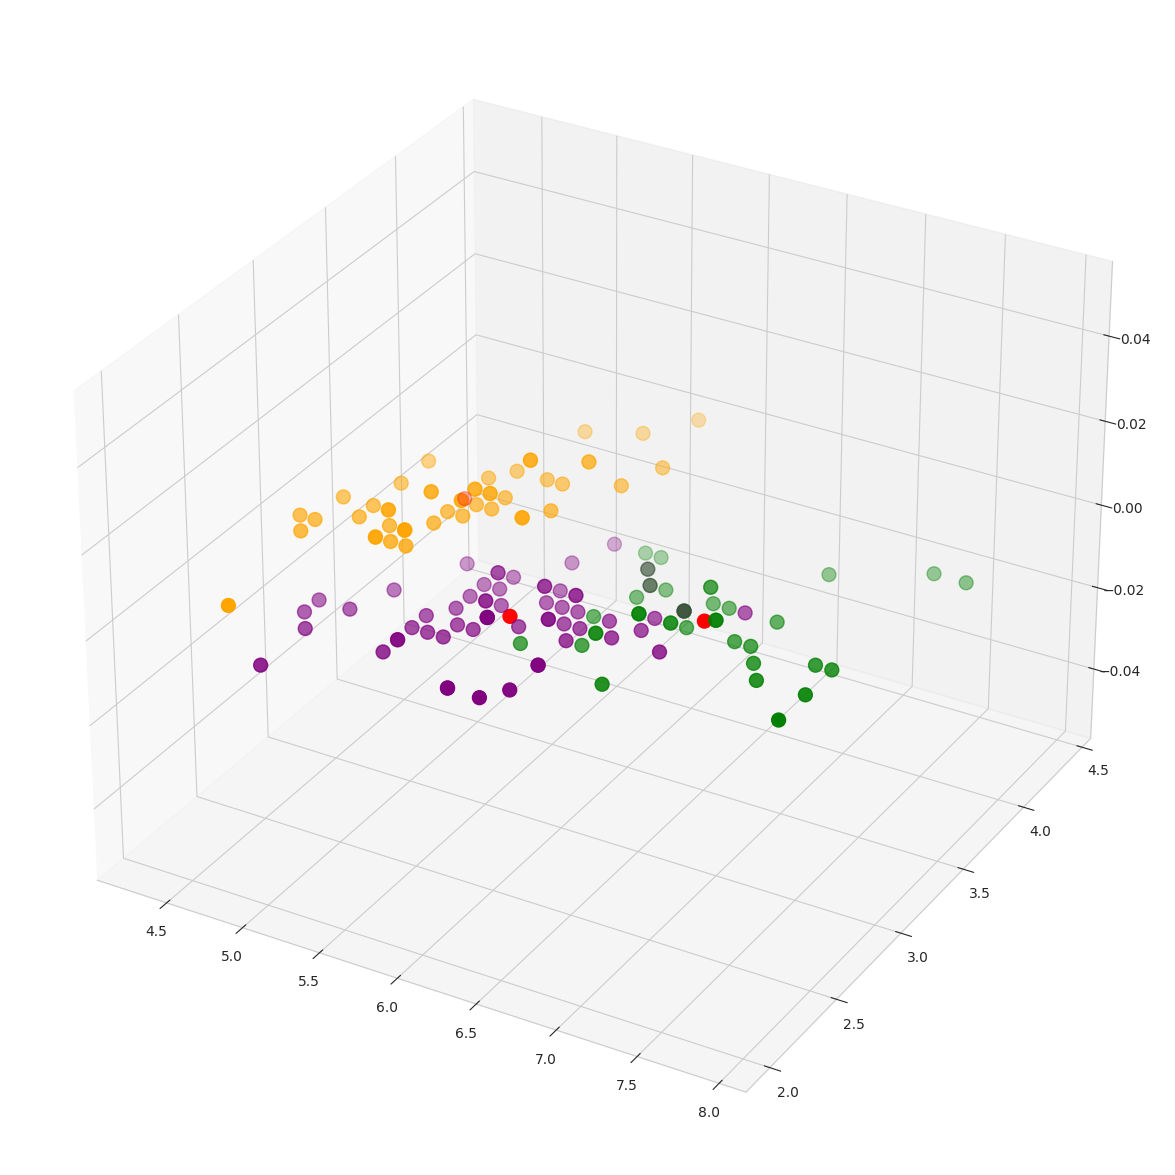

In [14]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()